## Naive Bayes

In [1]:
#Loading required packages
library(tidyverse)
library(ggplot2)
library(caret)
library(psych)
library(rpart)
library(randomForest)
library(Amelia)
library(mice)
library(e1071)
library(klaR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: Rcpp

## 
## Amelia II: Multiple Imp

### This example comes from [https://www.edureka.co/blog/naive-bayes-in-r/](https://www.edureka.co/blog/naive-bayes-in-r/)

### For a very nice manuall python tutorial see [https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

In [2]:
diabetes = read.csv("diabetes.csv", header = T)
str(diabetes)

'data.frame':	2000 obs. of  9 variables:
 $ Pregnancies             : int  2 0 0 0 1 0 4 8 2 2 ...
 $ Glucose                 : int  138 84 145 135 139 173 99 194 83 89 ...
 $ BloodPressure           : int  62 82 0 68 62 78 72 80 65 90 ...
 $ SkinThickness           : int  35 31 0 42 41 32 17 0 28 30 ...
 $ Insulin                 : int  0 125 0 250 480 265 0 0 66 0 ...
 $ BMI                     : num  33.6 38.2 44.2 42.3 40.7 46.5 25.6 26.1 36.8 33.5 ...
 $ DiabetesPedigreeFunction: num  0.127 0.233 0.63 0.365 0.536 ...
 $ Age                     : int  47 23 31 24 21 58 28 67 24 42 ...
 $ Outcome                 : int  1 0 1 1 0 0 0 0 0 0 ...


In [3]:
describe(diabetes)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pregnancies,1,2000,3.70350,3.3060630,3.000,3.2981250,2.9652000,0.000,17.00,17.000,0.9808925,0.4024401,0.073925817
Glucose,2,2000,121.18250,32.0686356,117.000,119.7112500,29.6520000,0.000,199.00,199.000,0.1585677,0.5524171,0.717076493
BloodPressure,3,2000,69.14550,19.1883148,72.000,71.3293750,11.8608000,0.000,122.00,122.000,-1.8516952,5.3038693,0.429063763
SkinThickness,4,2000,20.93500,16.1032429,23.000,20.3468750,17.7912000,0.000,110.00,110.000,0.2069174,0.1490412,0.360079458
Insulin,5,2000,80.25400,111.1805335,40.000,58.4318750,59.3040000,0.000,744.00,744.000,1.9930912,5.1043410,2.486072308
BMI,6,2000,32.19300,8.1499007,32.300,32.0711875,6.9682200,0.000,80.60,80.600,-0.0903197,4.1112849,0.182237320
DiabetesPedigreeFunction,7,2000,0.47093,0.3235526,0.376,0.4224337,0.2490768,0.078,2.42,2.342,1.8092618,4.9833437,0.007234855
Age,8,2000,33.09050,11.7864231,29.000,31.3187500,10.3782000,21.000,81.00,60.000,1.1794959,0.8174996,0.263552433
Outcome,9,2000,0.34200,0.4744982,0.000,0.3025000,0.0000000,0.000,1.00,1.000,0.6656337,-1.5577099,0.010610103


In [6]:
#Convert '0' values into NA
diabetes[, 2:7][diabetes[, 2:7] == 0] <- NA
head(diabetes,20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,2,138,62,35,NA,33.6,0.127,47,1
2,0,84,82,31,125,38.2,0.233,23,0
3,0,145,NA,NA,NA,44.2,0.630,31,1
4,0,135,68,42,250,42.3,0.365,24,1
5,1,139,62,41,480,40.7,0.536,21,0
6,0,173,78,32,265,46.5,1.159,58,0
7,4,99,72,17,NA,25.6,0.294,28,0
8,8,194,80,NA,NA,26.1,0.551,67,0
9,2,83,65,28,66,36.8,0.629,24,0


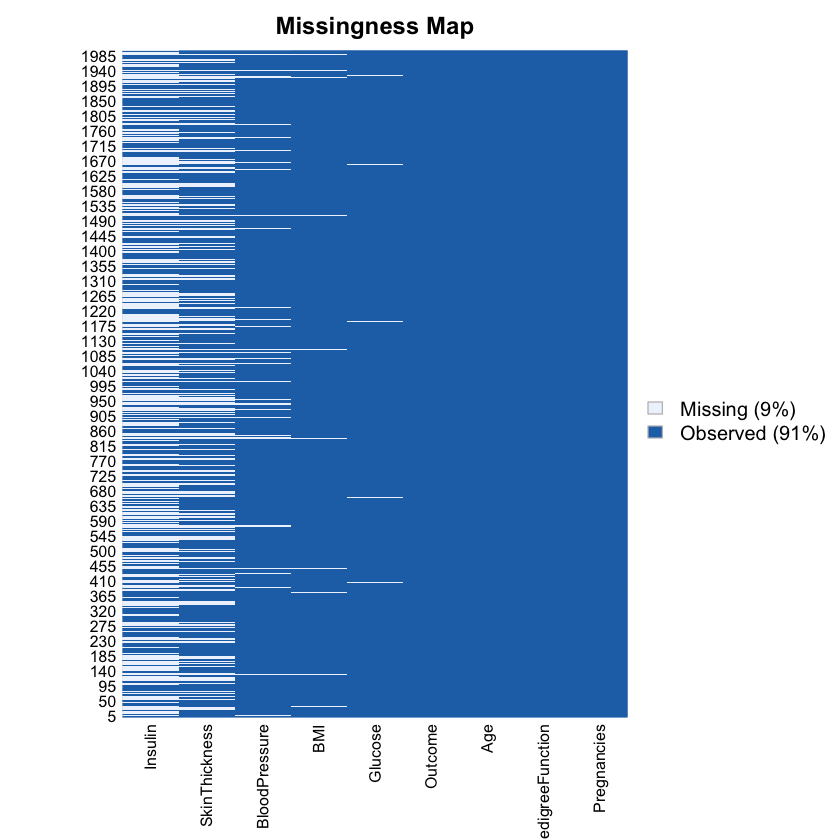

In [7]:
#visualize the missing data
missmap(diabetes)

In [8]:
###We can impute missing values using different techniques (k-mers, nearest neighbors)
mice_mod <- mice(diabetes[, c("Glucose","BloodPressure","SkinThickness","Insulin","BMI")], method='rf')
mice_complete <- complete(mice_mod)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

In [9]:
#Transfer the predicted missing values into the main diabetes set
diabetes$Glucose <- mice_complete$Glucose
diabetes$BloodPressure <- mice_complete$BloodPressure
diabetes$SkinThickness <- mice_complete$SkinThickness
diabetes$Insulin<- mice_complete$Insulin
diabetes$BMI <- mice_complete$BMI



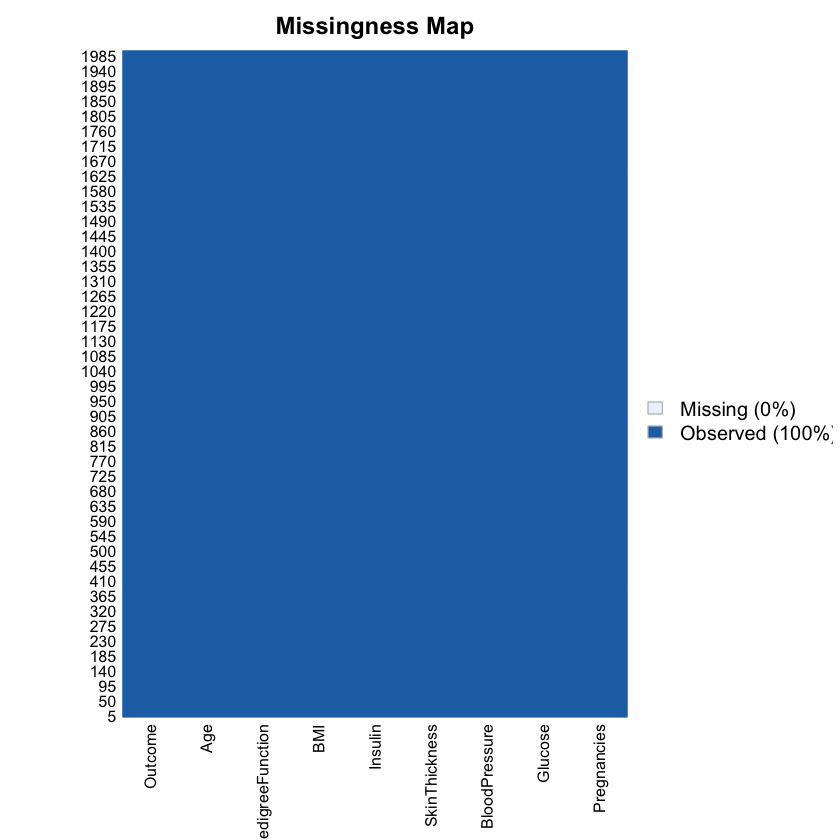

In [10]:
missmap(diabetes)

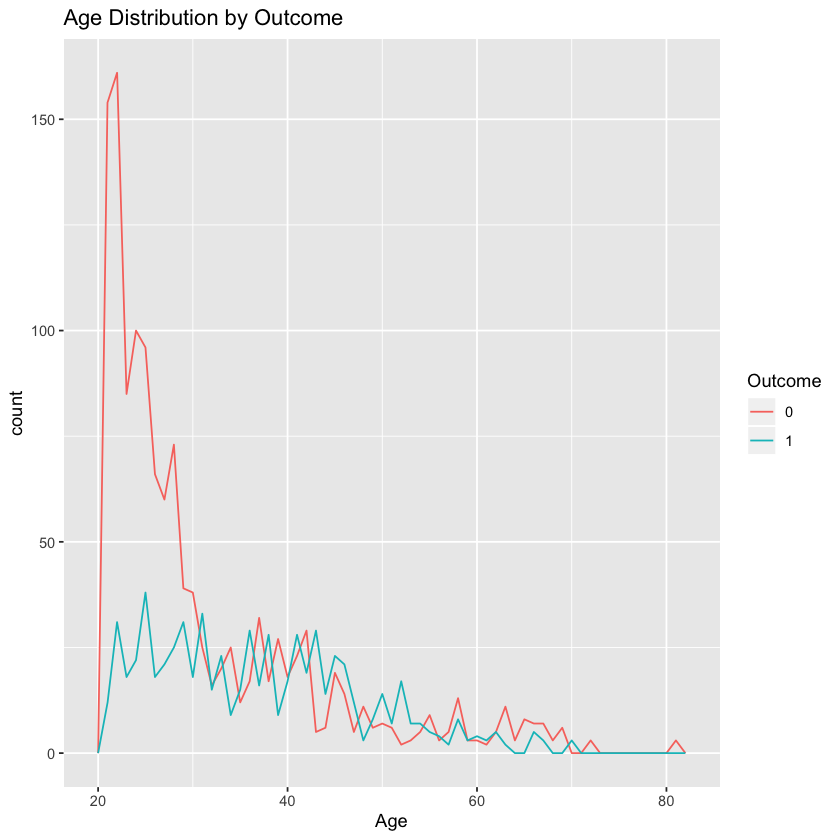

In [12]:
diabetes$Outcome = as.factor(diabetes$Outcome)
#Data Visualization
ggplot(diabetes, aes(Age, colour = Outcome)) +
  geom_freqpoly(binwidth = 1) + 
  labs(title="Age Distribution by Outcome")

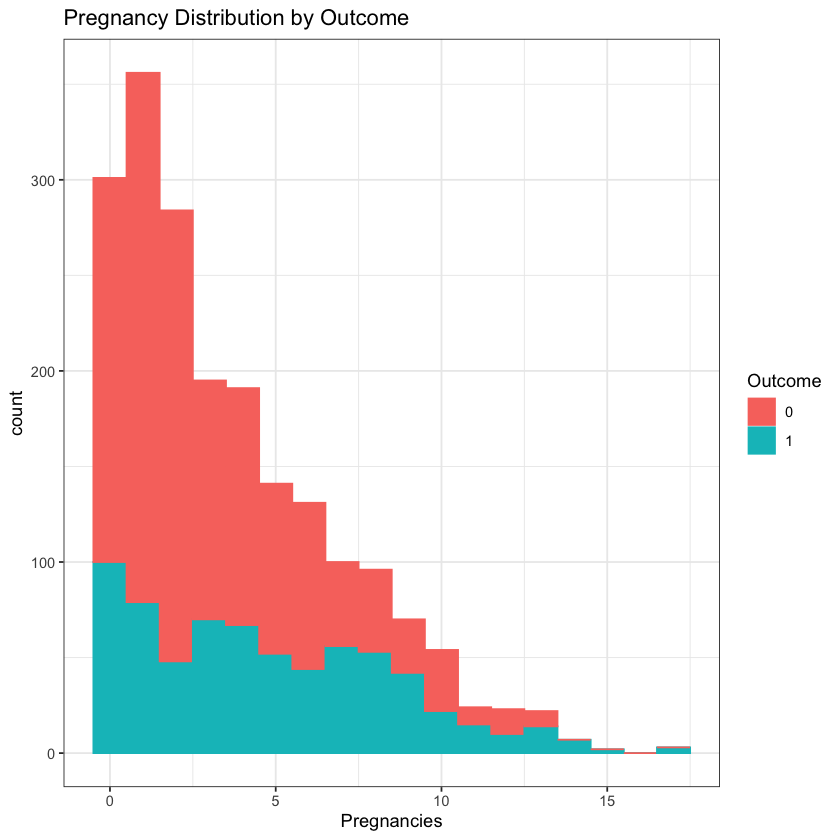

In [13]:
#visual 2
c <- ggplot(diabetes, aes(x=Pregnancies, fill=Outcome, color=Outcome)) +
  geom_histogram(binwidth = 1) + labs(title="Pregnancy Distribution by Outcome")
c + theme_bw()

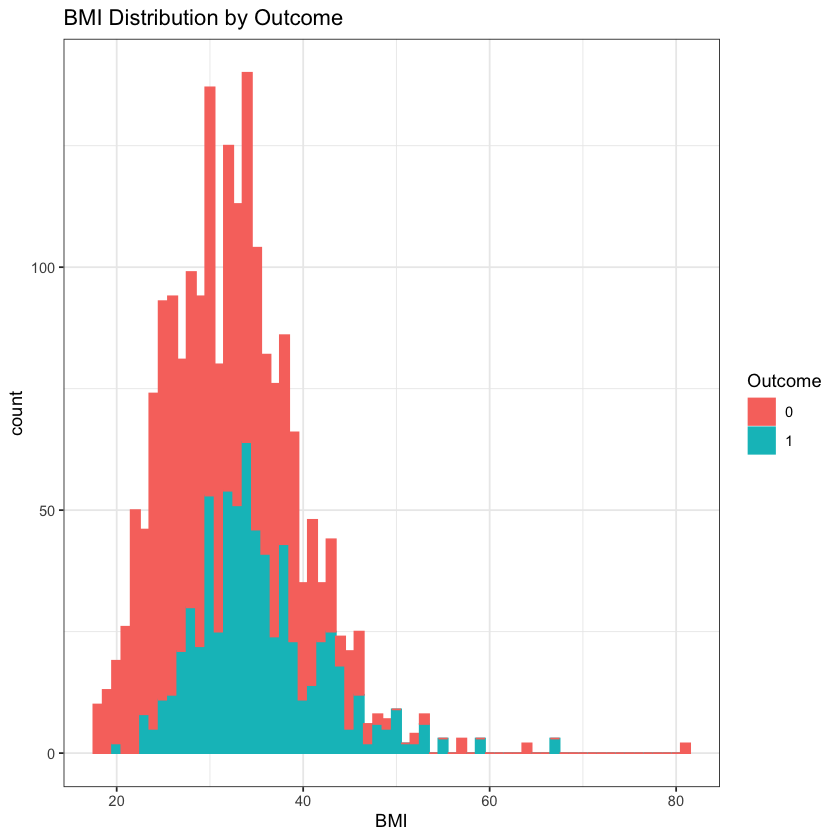

In [14]:
#visual 3
P <- ggplot(diabetes, aes(x=BMI, fill=Outcome, color=Outcome)) +
  geom_histogram(binwidth = 1) + labs(title="BMI Distribution by Outcome")
P + theme_bw()

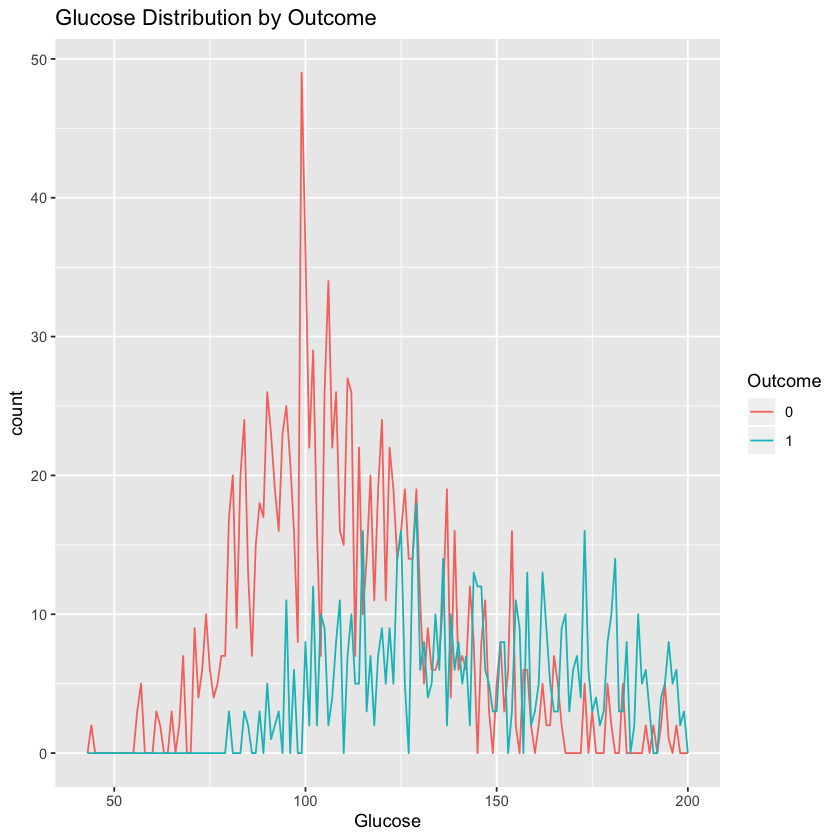

In [15]:
#visual 4
ggplot(diabetes, aes(Glucose, colour = Outcome)) +
  geom_freqpoly(binwidth = 1) + labs(title="Glucose Distribution by Outcome")


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



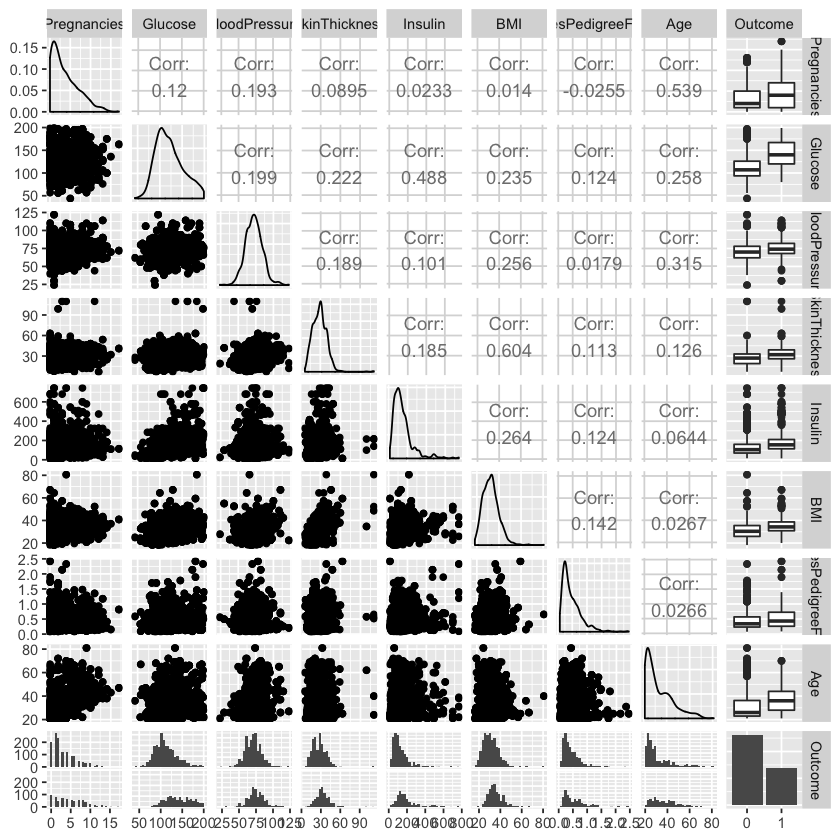

In [17]:
#visual 5
#install.packages("GGally")
library(GGally)
ggpairs(diabetes)

In [ ]:
#Building a model
#split data into training and test data sets
library(caret)
set.seed(998)
indxTrain <- createDataPartition(y = diabetes$Outcome,p = 0.75,list = FALSE)
training <- diabetes[indxTrain,]
testing <- diabetes[-indxTrain,]

In [ ]:
#Check dimensions of the split

prop.table(table(diabetes$Outcome)) * 100
prop.table(table(training$Outcome)) * 100
prop.table(table(testing$Outcome)) * 100

In [ ]:
#create objects x which holds the predictor variables and y 
#which holds the response variables
x = training[,-9]
y = training$Outcome

In [ ]:
model = train(x,y,'naive_bayes',trControl=trainControl(method='cv',number=10))
#?naive_bayes

In [ ]:
#Model Evaluation
#Predict testing set
Predict <- predict(model,newdata = testing )

In [ ]:
#Get the confusion matrix to see accuracy value and other parameter values

confusionMatrix(Predict, testing$Outcome )

In [ ]:
#Plot Variable performance
X <- varImp(model)
plot(X)